In [ ]:
!pip install torch torchvision
!pip install Pillow

In [1]:
%matplotlib inline 
import torch
import torch.optim as optim
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
vgg = models.vgg19(pretrained=True).features

for param in vgg.parameters():
    param.requires_grad_(False)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /home/longxiajun/.torch/models/vgg19-dcbb9e9d.pth
574673361.0 bytes


Parameter containing:
tensor([[[[-5.3474e-02, -4.9257e-02, -6.7942e-02],
          [ 1.5314e-02,  4.5068e-02,  2.1444e-03],
          [ 3.6226e-02,  1.9999e-02,  1.9864e-02]],

         [[ 1.7015e-02,  5.5403e-02, -6.2293e-03],
          [ 1.4165e-01,  2.2705e-01,  1.3758e-01],
          [ 1.2000e-01,  2.0030e-01,  9.2114e-02]],

         [[-4.4885e-02,  1.2680e-02, -1.4497e-02],
          [ 5.9742e-02,  1.3955e-01,  5.4102e-02],
          [-9.6141e-04,  5.8304e-02, -2.9663e-02]]],


        [[[ 2.6072e-01, -3.0489e-01, -5.0152e-01],
          [ 4.1376e-01, -2.0831e-01, -4.9086e-01],
          [ 5.8770e-01,  4.2851e-01, -1.3850e-01]],

         [[ 2.8746e-01, -3.3338e-01, -4.5564e-01],
          [ 3.7836e-01, -2.9144e-01, -4.9720e-01],
          [ 5.4778e-01,  4.8983e-01, -1.7166e-01]],

         [[ 6.7260e-02, -9.5386e-02, -3.8037e-02],
          [ 6.1955e-02, -1.3125e-01, -1.0691e-01],
          [ 4.8107e-02,  2.2999e-01, -3.0578e-02]]],


        [[[-3.2457e-02,  1.6281e-01,  5.9687

Parameter containing:
tensor([-0.9130,  0.3068, -1.3064, -0.7762, -0.7888, -0.4155,  0.2666, -0.8560,
         0.3901,  0.1206,  0.2143,  0.3767,  0.2672, -0.8205,  0.0463,  0.4325,
         0.3040, -0.1048,  0.4146,  0.3701,  0.4728,  0.4447,  0.1775, -1.1050,
         0.3911, -0.8114,  0.0029,  0.2943,  0.2926,  0.5354,  0.4415,  0.4302,
         0.5140,  0.4039,  0.4905,  0.3326,  0.3844,  0.3955,  0.4361,  0.2157,
         0.2640,  0.3557, -0.7006, -0.0398,  0.1095, -1.2560,  0.0400, -0.2300,
         0.0763, -0.4009, -0.8053,  0.3830, -0.2696, -0.3153,  0.4309,  0.3720,
        -0.2352, -0.2580,  0.2720,  0.2830, -0.2227, -0.1897,  0.3060,  0.3920])

Parameter containing:
tensor([[[[ 5.3294e-02,  8.2804e-02,  8.5524e-02],
          [ 2.6976e-02,  3.2650e-02,  5.4144e-02],
          [-4.4511e-02, -5.2258e-03, -4.1381e-03]],

         [[-1.9152e-02,  2.2080e-02,  1.0595e-02],
          [-4.2938e-02, -1.4895e-02, -4.5747e-02],
          [-1.8811e-02, -2.8152e-02, -6.3361e-02]],

         [[ 4.0121e-02,  1.2453e-01,  9.8356e-02],
          [-3.7617e-02,  4.6662e-02, -4.3144e-03],
          [-1.1518e-01, -9.6260e-02, -8.5768e-02]],

         ...,

         [[-4.8365e-02, -7.3883e-02, -8.2087e-02],
          [ 4.3794e-02,  1.8011e-02, -1.8619e-04],
          [ 1.0096e-01,  8.9305e-02,  4.2637e-02]],

         [[ 2.3180e-02,  8.8373e-03, -7.0260e-02],
          [ 6.0539e-02,  2.2940e-02,  1.7419e-02],
          [ 2.5101e-03,  7.3809e-02,  3.4366e-02]],

         [[-6.5116e-02, -6.6284e-02, -8.2296e-02],
          [-1.2183e-01, -1.4542e-01, -1.4393e-01],
          [-1.5220e-01, -1.7159e-01, -1.3308e-01]]],


        [[[ 2.6774e-02,  2.9679

Parameter containing:
tensor([-5.8394e-02, -1.4754e-01,  1.8017e-01, -2.8633e-01,  1.4053e-02,
        -3.9571e-02,  1.0259e-01, -8.8048e-04, -7.7598e-02, -1.8744e-01,
        -3.4763e-02,  2.2564e-02, -6.1512e-02, -3.9896e-01, -2.3920e-01,
         1.1534e-01, -1.1614e-01, -2.2889e-01, -1.6896e-01, -2.4117e-01,
         5.9063e-01,  4.4781e-04, -3.8955e-02, -8.2188e-01, -1.5366e-01,
         2.2464e-02,  4.2782e-01, -5.8604e-02, -4.8700e-02,  3.0054e-01,
        -5.6536e-02,  5.2338e-02,  2.4208e-01, -3.2136e-03,  4.8011e-01,
        -8.3752e-03,  1.7856e-01,  3.9528e-01, -2.2767e-02,  5.7821e-02,
         6.5798e-04, -1.3895e-01, -1.6600e-01,  7.9103e-03,  1.1497e-01,
         1.0045e-01,  2.3931e-01,  4.0163e-01, -1.3901e-01, -4.5015e-01,
         1.9804e-01, -1.4634e-01, -1.1509e-01,  7.2199e-02, -1.0609e-02,
         3.5647e-01,  9.0835e-02, -1.5250e-01,  2.1137e-01, -2.0729e-01,
         1.1017e-02,  2.3209e-01,  9.1408e-02,  2.5651e-02])

Parameter containing:
tensor([[[[-2.3904e-02,  4.7934e-03,  1.7985e-03],
          [-3.3069e-02,  9.1337e-02,  5.3385e-02],
          [-3.6013e-02, -5.7739e-02,  2.7938e-02]],

         [[-1.7091e-02,  1.6409e-02,  5.1454e-03],
          [-5.6018e-03,  1.5107e-02,  1.4861e-02],
          [-3.2590e-02,  2.3828e-04,  1.0019e-02]],

         [[ 7.3900e-02,  6.3416e-02, -4.8415e-03],
          [ 2.3677e-02,  1.0052e-02, -2.0522e-02],
          [ 7.5609e-03, -4.4406e-03,  4.5216e-05]],

         ...,

         [[-7.2605e-03, -1.9591e-02,  5.3953e-02],
          [-2.4696e-02, -6.2119e-02,  2.4012e-02],
          [ 4.8663e-02, -1.8699e-02, -7.3196e-03]],

         [[-2.5791e-02, -3.6767e-02,  1.6626e-02],
          [-4.5946e-03, -5.2197e-02,  1.5602e-02],
          [-2.1030e-02, -2.0089e-02,  9.0214e-03]],

         [[-3.3459e-02,  4.4165e-05,  7.9814e-02],
          [ 4.0092e-02, -2.0911e-03, -1.3580e-02],
          [-5.3820e-04,  8.9286e-02,  1.8459e-02]]],


        [[[-2.8869e-02, -1.1822

Parameter containing:
tensor([ 0.0246,  0.1334,  0.0083,  0.0499,  0.0313,  0.0835, -0.0160,  0.1635,
         0.0932,  0.2730, -0.0729, -0.1390,  0.1081,  0.2314, -0.0126, -0.0138,
        -0.0224,  0.1828, -0.0168, -0.0981,  0.1010,  0.0876, -0.0171,  0.0684,
         0.1531,  0.1562, -0.1067,  0.0819, -0.0074,  0.2974,  0.0154,  0.0075,
         0.0485,  0.1132,  0.1983,  0.0532, -0.0295,  0.1519, -0.0554,  0.1351,
         0.1876,  0.0366, -0.1132, -0.0876,  0.0925,  0.1133,  0.1003,  0.0308,
         0.1077,  0.0830,  0.1297,  0.1864,  0.0618, -0.0429,  0.0977, -0.0016,
        -0.0371,  0.1010,  0.0302,  0.3531, -0.0024, -0.0248,  0.0886,  0.1082,
         0.0553,  0.1412,  0.0944,  0.0037,  0.1766, -0.0232,  0.0941,  0.0587,
         0.0581, -0.0023,  0.0879,  0.0208,  0.2336,  0.0670, -0.1960, -0.0462,
         0.0868, -0.1003,  0.0229,  0.1479,  0.2186,  0.0067,  0.0624, -0.2049,
         0.1046,  0.0477,  0.0359, -0.0860,  0.0925,  0.0408,  0.1270, -0.1244,
        -0.0697,  

Parameter containing:
tensor([[[[ 1.4944e-02, -3.7181e-02,  5.2933e-02],
          [-1.6621e-03, -5.2030e-02, -3.8966e-03],
          [ 3.9774e-02, -5.6291e-03, -2.2464e-02]],

         [[-7.8208e-03, -2.0675e-02,  2.7717e-02],
          [-9.7421e-02, -9.1441e-02, -1.7880e-02],
          [ 4.1370e-02,  3.5009e-02,  4.7078e-02]],

         [[ 4.9653e-03,  3.1277e-02,  2.4781e-02],
          [-2.2425e-02, -2.7588e-02, -1.2751e-02],
          [ 4.2515e-03,  3.0329e-03,  1.3350e-02]],

         ...,

         [[ 8.8496e-02,  2.4323e-02,  2.7986e-02],
          [-5.4081e-03, -1.9963e-01, -5.1464e-02],
          [ 1.1866e-02, -2.7785e-02,  2.1018e-01]],

         [[ 4.0391e-02,  4.4052e-03, -4.4008e-03],
          [ 1.4212e-02, -9.8625e-03,  1.3768e-02],
          [-1.9370e-02, -2.1431e-02,  5.2087e-03]],

         [[ 1.2320e-03, -2.8975e-02, -2.2249e-02],
          [ 1.6791e-02,  8.4847e-02,  4.3377e-02],
          [ 1.9656e-03,  1.9694e-02, -1.9070e-03]]],


        [[[ 4.8440e-02, -4.4763

Parameter containing:
tensor([ 0.0836, -0.0822, -0.0695, -0.0163,  0.4373,  0.0757, -0.0441, -0.0224,
        -0.1218,  0.0133,  0.0878,  0.1036, -0.0422, -0.2496,  0.0257, -0.0795,
        -0.1002, -0.0494, -0.0521, -0.1298, -0.1565, -0.0364, -0.0982, -0.1845,
        -0.0191, -0.0344, -0.2473,  0.0965,  0.1396, -0.0756,  0.1497,  0.0961,
        -0.0823, -0.2123,  0.1143, -0.0253, -0.2277,  0.0362, -0.0131, -0.1075,
        -0.2306, -0.0403, -0.0982, -0.0019, -0.0630,  0.4740, -0.0289,  0.0884,
        -0.1384, -0.0431, -0.0775,  0.0037,  0.0107, -0.2188,  0.0554,  0.4694,
         0.0167, -0.0631,  0.2071,  0.1297, -0.2193,  0.1582,  0.1798,  0.0265,
         0.1451,  0.0028,  0.0854, -0.0785,  0.0220,  0.0946,  0.0038,  0.0620,
        -0.1214, -0.1129,  0.3075,  0.2730,  0.1583,  0.1078, -0.1199,  0.0878,
        -0.1505,  0.0593,  0.2910, -0.0743,  0.1736, -0.1180, -0.1052, -0.1700,
        -0.0358,  0.0251, -0.0407,  0.0319,  0.0409,  0.0217,  0.0929,  0.0265,
         0.0082, -

Parameter containing:
tensor([[[[ 0.0355,  0.0499,  0.0509],
          [-0.0655, -0.0615, -0.0344],
          [-0.0273, -0.0449,  0.0184]],

         [[ 0.0075, -0.0088, -0.0093],
          [ 0.0125,  0.0303,  0.0279],
          [-0.0358,  0.0183,  0.0161]],

         [[-0.0237,  0.0058, -0.0199],
          [ 0.0264,  0.0255, -0.0009],
          [ 0.0273,  0.0237, -0.0038]],

         ...,

         [[-0.0209, -0.0111, -0.0272],
          [-0.0097, -0.0067, -0.0148],
          [-0.0159,  0.0143,  0.0180]],

         [[-0.0296, -0.0428, -0.0323],
          [ 0.0446, -0.0007, -0.0018],
          [ 0.0509,  0.0475,  0.0259]],

         [[ 0.0006,  0.0491,  0.0092],
          [ 0.0132,  0.0277, -0.0007],
          [ 0.0058,  0.0559,  0.0480]]],


        [[[-0.0119, -0.0015,  0.0425],
          [ 0.0156,  0.0296,  0.0560],
          [ 0.0044,  0.0488,  0.0339]],

         [[-0.0091, -0.0404, -0.0055],
          [-0.0149, -0.0365, -0.0328],
          [-0.0309, -0.0243, -0.0334]],

         

Parameter containing:
tensor([-5.7446e-02,  2.4570e-02,  9.0959e-02, -3.2109e-01,  1.1870e-02,
         3.3711e-02,  2.3067e-02, -4.8484e-03,  1.2104e-01,  1.1503e-02,
         2.0618e-03,  2.3955e-02,  4.0401e-02,  1.1837e-01, -7.5877e-02,
         5.7691e-02,  1.5278e-01,  8.6564e-02,  1.5841e-01, -7.3258e-02,
        -1.3988e-02,  5.0015e-02, -1.0287e-01, -2.7890e-02,  6.8270e-02,
        -4.2715e-02, -1.4347e-02,  4.1650e-02, -1.1144e-01, -2.2445e-01,
        -1.1803e-02,  6.3860e-02, -7.7212e-02, -5.5002e-03, -6.3036e-02,
         9.1262e-03,  1.2340e-01, -1.4720e-01, -4.7101e-02,  8.2743e-02,
         2.5719e-02, -5.2891e-02,  8.8058e-02,  9.2322e-02, -1.1663e-01,
        -6.5487e-02,  1.0130e-01,  5.9148e-02,  9.1565e-02,  1.2468e-01,
        -1.2594e-01, -6.2502e-02,  1.9690e-01, -1.8167e-02,  6.7858e-03,
         1.1838e-02, -6.5850e-02, -7.8022e-03,  2.5793e-01, -1.1481e-01,
         1.2569e-01,  7.2781e-02,  3.7666e-02, -2.0776e-01,  2.1917e-01,
         5.9751e-03, -1.5813e

Parameter containing:
tensor([[[[ 2.2190e-02,  9.3375e-03, -2.3806e-03],
          [ 7.9333e-04,  3.1214e-03, -4.1305e-04],
          [ 1.2009e-02, -6.1337e-03,  1.7373e-02]],

         [[-1.7068e-03,  8.7343e-03, -1.9785e-02],
          [-8.7037e-04,  1.2904e-02, -1.5547e-02],
          [ 5.6292e-03,  3.7641e-03, -8.1919e-03]],

         [[ 1.0456e-02,  1.5558e-02, -1.6826e-02],
          [-2.6303e-02,  2.4462e-03, -2.7086e-03],
          [-3.6940e-02, -9.0857e-03,  9.6455e-03]],

         ...,

         [[ 1.3195e-02,  8.9371e-03, -1.9751e-02],
          [ 4.6812e-03,  3.4504e-03, -2.7716e-03],
          [ 2.9848e-03, -1.0504e-02, -1.0525e-02]],

         [[ 1.6012e-02, -3.9771e-03,  6.3396e-05],
          [ 2.3741e-02,  9.2671e-03,  1.5559e-02],
          [ 1.3264e-02,  1.7373e-03,  1.2447e-02]],

         [[-2.5741e-03, -1.1160e-03, -1.9425e-03],
          [-6.2923e-03, -1.5996e-02, -1.3790e-02],
          [ 3.4548e-03, -8.0707e-03, -1.9676e-02]]],


        [[[-1.7457e-02, -6.2276

Parameter containing:
tensor([-1.6012e-01, -5.0735e-02, -3.7225e-02,  1.5612e-01,  6.2651e-02,
         9.1161e-02, -9.1950e-02, -6.1958e-02, -1.0152e-01,  2.7419e-02,
         8.4163e-02,  4.0658e-02,  2.2090e-01,  3.6786e-01, -6.0822e-02,
         4.7705e-01,  2.1508e-02, -3.6398e-02,  1.5033e-01, -4.0052e-02,
         1.4129e-01,  1.0264e-01,  6.4401e-02,  3.6530e-02, -7.9153e-02,
         1.1684e-01,  1.7219e-01,  5.9786e-02,  5.5542e-02, -1.4757e-01,
         2.0579e-02,  7.8264e-02, -2.0459e-02,  8.7215e-02,  1.5873e-01,
         2.0761e-02,  1.1587e-01,  6.8712e-02,  1.0054e-01,  4.6842e-02,
         5.3803e-02, -1.7300e-01,  1.0532e-01, -9.2736e-03, -2.9297e-03,
        -2.2108e-01,  2.3624e-01, -1.5397e-01,  6.4517e-02,  2.6478e-02,
        -1.2072e-01,  1.8867e-02,  6.4691e-03,  1.3244e-02,  4.5646e-02,
         2.7232e-01, -3.7951e-02,  1.2576e-02,  4.0468e-02, -3.6800e-03,
        -9.4446e-02,  3.1483e-02, -1.2433e-03,  9.4844e-02, -1.4001e-02,
        -5.7131e-02,  1.2919e

Parameter containing:
tensor([[[[-2.2149e-02, -8.2414e-03,  9.6534e-03],
          [-1.3779e-02, -6.8542e-03,  7.5707e-03],
          [-2.4095e-03,  2.4156e-02,  1.3655e-02]],

         [[-1.6860e-02, -1.0794e-02,  1.7457e-02],
          [-2.1419e-02, -1.2860e-02,  3.4045e-02],
          [-2.6813e-02, -3.2066e-02,  6.4252e-03]],

         [[ 2.4645e-02,  6.3990e-02,  3.2102e-02],
          [-1.8808e-02,  4.6972e-02,  2.0714e-02],
          [-3.9489e-02, -5.4023e-02,  5.1483e-03]],

         ...,

         [[-2.4233e-02, -3.5629e-02, -1.6502e-02],
          [-9.8831e-03, -2.8307e-02, -3.1861e-02],
          [-2.0740e-02, -1.8873e-02, -3.5950e-02]],

         [[-1.4095e-02, -2.7954e-02, -1.6467e-02],
          [ 3.5940e-03, -4.0346e-02, -6.5416e-03],
          [ 5.5689e-03, -6.9456e-03,  2.2095e-02]],

         [[ 1.6124e-02, -2.5622e-04, -2.0933e-02],
          [-1.2210e-02,  5.8796e-03, -2.6578e-02],
          [ 2.4079e-02,  3.7444e-02, -6.3200e-04]]],


        [[[ 1.8710e-02,  2.8985

Parameter containing:
tensor([ 2.3224e-01, -2.4138e-04,  6.4960e-02, -4.2017e-01,  6.0453e-02,
         9.8442e-02,  4.6449e-02, -7.3136e-03, -1.8736e-02, -1.9464e-02,
         7.8066e-02,  8.2655e-02,  1.2813e-01,  8.7396e-02,  1.7907e-01,
         1.3942e-01,  2.0888e-02, -8.0227e-03, -4.0741e-02,  1.1292e-02,
         2.2233e-02,  2.7878e-02, -2.5189e-01, -3.2148e-01,  1.1135e-01,
        -5.7587e-03, -8.3068e-03, -6.6311e-02,  1.1230e-01,  1.1002e-01,
         2.5989e-02,  4.4331e-02, -9.7547e-02,  1.0856e-01,  3.5750e-03,
         5.6862e-02,  9.4468e-02,  1.4510e-02, -1.3779e-01,  8.2087e-02,
         7.0894e-02,  1.3279e-01,  3.9849e-02,  1.6688e-01,  1.8628e-01,
         5.3910e-02,  8.5733e-02, -1.6489e-02,  1.0809e-02,  4.9333e-02,
         1.8078e-01, -4.7200e-02,  5.0713e-02, -7.0014e-02, -2.5531e-02,
        -1.1994e-01, -5.9129e-02,  3.7465e-02,  4.3772e-02,  5.7414e-04,
         6.9726e-02,  1.9478e-01,  2.8760e-03, -2.2992e-02, -7.7390e-02,
        -5.2995e-02,  2.2579e

Parameter containing:
tensor([[[[-2.0054e-02,  4.5959e-02,  2.4285e-03],
          [-1.0683e-02,  5.2972e-03,  3.7511e-03],
          [-2.4106e-03, -1.2168e-02,  1.0104e-02]],

         [[-1.2632e-02, -2.5883e-02, -8.5592e-03],
          [-1.2386e-02, -5.5469e-02, -4.8311e-02],
          [-1.6625e-02, -3.7525e-02, -2.6493e-02]],

         [[ 3.8509e-02,  3.7259e-02, -1.4662e-02],
          [ 5.7820e-02,  3.1240e-02, -5.4511e-03],
          [-1.6632e-02, -6.7681e-03,  1.3355e-02]],

         ...,

         [[-8.8624e-03,  2.4756e-02,  3.0510e-02],
          [-2.1363e-02,  2.0381e-02,  3.5623e-02],
          [-1.8509e-03,  3.5199e-03, -1.2715e-02]],

         [[ 3.4045e-03, -1.9371e-02, -1.0391e-02],
          [ 3.0154e-03, -2.5516e-02, -2.0094e-02],
          [ 1.4827e-02,  2.7095e-03,  6.5585e-03]],

         [[-1.2619e-02,  6.1968e-04,  9.2541e-03],
          [-1.9611e-02,  1.9820e-02,  3.8648e-03],
          [-1.2689e-02,  6.4709e-03, -7.3962e-03]]],


        [[[ 1.3729e-02,  1.4296

Parameter containing:
tensor([ 1.1129e-01, -6.5595e-02,  1.1674e-01,  1.0266e-01,  1.3823e-01,
        -1.0093e-01, -3.2487e-02,  2.7276e-02, -1.1670e-01,  4.7968e-02,
        -1.3399e-02, -1.5048e-02,  3.0006e-02,  4.6775e-02,  4.5095e-02,
        -7.0518e-02, -1.3427e-02,  5.9646e-02, -4.3785e-02,  9.6971e-02,
        -5.3902e-02,  1.0772e-01,  2.3518e-02, -8.9939e-02, -3.1992e-03,
         7.1295e-02,  5.8106e-02,  3.3375e-01, -4.8308e-02,  3.2969e-02,
        -2.4833e-02, -1.9172e-02,  2.7820e-01, -1.1369e-01,  1.2396e-01,
        -1.2624e-01, -7.3003e-02,  1.2396e-01, -1.6797e-02, -6.3193e-02,
         9.5591e-02, -9.0238e-02,  5.1184e-01,  4.9748e-02,  5.3947e-02,
        -5.3706e-02,  1.5368e-03, -6.6550e-03, -5.9959e-02,  4.0225e-02,
        -4.1607e-02,  2.4601e-02,  4.3741e-02, -4.0718e-02, -5.7726e-02,
         2.4598e-02, -2.2844e-02, -1.2988e-01,  1.6749e-01,  1.8316e-01,
         8.0369e-02, -8.1832e-02, -2.2437e-03, -2.9780e-02,  4.8575e-03,
         4.8244e-02, -5.5178e

Parameter containing:
tensor([[[[ 7.6028e-03,  1.5823e-02,  5.3801e-03],
          [ 3.0424e-03,  1.7674e-02,  3.4824e-02],
          [ 2.9429e-02,  8.2329e-03,  3.1109e-02]],

         [[ 1.8723e-02,  1.4447e-02, -1.9750e-03],
          [ 2.0086e-02, -1.5187e-03,  8.5380e-03],
          [-3.9245e-03, -9.8634e-04,  9.9558e-03]],

         [[-1.4760e-02, -1.2458e-02,  2.2764e-02],
          [-1.7024e-02, -3.0757e-02,  7.2522e-03],
          [ 8.3806e-03,  9.8483e-03,  1.4754e-02]],

         ...,

         [[-2.5732e-02, -4.7436e-02,  4.9733e-04],
          [-1.0372e-03, -5.3227e-03,  1.4351e-02],
          [ 2.2109e-02,  6.8368e-03,  1.3325e-02]],

         [[-2.3630e-02, -2.6565e-02, -2.1751e-02],
          [ 3.3754e-03, -3.7258e-03, -1.5960e-02],
          [ 3.3379e-02,  9.6359e-03, -6.6191e-03]],

         [[-6.8704e-03, -2.3740e-02,  7.7378e-03],
          [-3.4402e-02, -1.6394e-02, -1.1397e-02],
          [-8.2355e-03,  1.7833e-04, -1.5460e-02]]],


        [[[-1.1351e-02, -1.4132

Parameter containing:
tensor([ 4.8539e-02,  1.8543e-01,  1.0437e-02, -5.2374e-02,  2.8441e-02,
         5.9573e-02, -3.1299e-02,  4.2916e-02, -8.0564e-03, -1.1774e-02,
        -1.4840e-01, -3.9615e-02, -1.4545e-01, -4.1749e-02, -8.9216e-02,
         3.1039e-01,  8.0442e-02, -1.7013e-01,  7.1368e-02,  2.1807e-01,
         8.4100e-02, -1.1073e-01, -3.4990e-02, -9.2167e-04,  1.4945e-01,
        -1.9167e-03,  4.8934e-03,  1.9026e-02,  5.3401e-02,  2.0975e-01,
         5.3031e-02,  5.9212e-02, -4.7142e-02,  1.4421e-02,  3.0032e-02,
         6.9043e-02, -7.8601e-02, -2.9682e-02,  8.6846e-02,  1.9919e-01,
        -7.7397e-02,  1.3564e-01,  4.2665e-02,  3.0389e-02,  8.1631e-02,
         1.9028e-02, -7.3459e-02,  5.8934e-03, -1.9776e-02,  5.9806e-02,
         3.7804e-02, -1.0258e-01,  3.6124e-02, -4.1583e-02,  3.4364e-02,
        -9.0316e-03,  2.8344e-02,  7.5596e-03, -3.2274e-02,  5.5055e-03,
         4.6274e-03,  5.2689e-02, -2.4146e-02, -6.5551e-02,  9.0461e-02,
        -2.7640e-02,  5.2692e

Parameter containing:
tensor([[[[-6.3067e-02, -2.6282e-02,  2.0478e-03],
          [-6.5387e-02, -2.5262e-02,  1.5350e-03],
          [-3.2395e-02, -2.4593e-02, -1.6119e-02]],

         [[ 1.4005e-03,  1.5848e-02,  2.2248e-02],
          [-6.5395e-03,  8.8427e-03, -6.1951e-03],
          [-8.3691e-03, -4.9664e-03, -2.3819e-02]],

         [[-1.0673e-02, -7.9837e-03, -5.1039e-03],
          [ 3.1638e-04,  1.2396e-02,  6.1134e-03],
          [ 1.0141e-02,  2.8345e-02,  1.8650e-02]],

         ...,

         [[ 1.3700e-02,  1.5561e-02,  1.3848e-02],
          [ 1.7697e-02,  8.2817e-03,  1.1439e-02],
          [ 2.9955e-04, -8.5686e-03,  4.2489e-03]],

         [[ 3.4649e-03,  2.3276e-03, -3.2113e-03],
          [-8.5441e-03, -6.6467e-04,  1.4675e-02],
          [ 7.4824e-03, -4.6237e-03,  9.1847e-03]],

         [[-5.1088e-03, -5.4534e-03, -9.6147e-04],
          [-1.1531e-02, -1.8771e-02, -6.8382e-03],
          [-1.3029e-02, -4.4073e-03,  1.7698e-03]]],


        [[[-2.1158e-02, -8.0839

Parameter containing:
tensor([ 6.3634e-02, -1.0967e-02, -3.2003e-02,  2.1559e-01,  1.5291e-02,
         2.0261e-02,  1.3345e-01,  2.6394e-03,  1.0827e-02, -8.4166e-02,
         1.1893e-01, -1.0924e-01,  4.0563e-02, -5.8301e-04,  1.0442e-01,
         8.1165e-02,  7.9415e-03,  1.0516e-01, -2.8611e-02,  1.3504e-01,
         5.9757e-02,  9.8144e-03, -7.2917e-02,  3.1385e-02,  1.7999e-01,
         2.6940e-02,  1.6145e-01,  8.0286e-02, -1.9479e-02,  3.8739e-02,
        -7.1590e-03,  7.8570e-03,  8.7725e-02,  4.8550e-03,  2.2504e-02,
         5.3431e-02,  3.5247e-02,  8.5775e-02,  1.3301e-03, -1.9315e-03,
         1.2969e-01,  8.6063e-03,  2.1605e-01,  1.3279e-02,  1.8656e-01,
         7.5895e-03, -1.8299e-03, -5.7994e-02,  6.6223e-02,  7.6909e-02,
         2.1927e-02,  8.8756e-02, -4.8525e-02,  1.2341e-02,  4.9017e-02,
        -1.0056e-02,  4.7132e-02,  7.0428e-02, -2.1244e-02,  4.1273e-02,
         3.5426e-03, -2.3756e-01, -7.7789e-02, -8.4740e-02,  8.0331e-02,
         1.0795e-01,  6.5318e

Parameter containing:
tensor([[[[ 2.9275e-03, -1.2253e-02, -2.5162e-02],
          [ 1.3126e-02,  1.6620e-02, -6.9234e-03],
          [ 3.0615e-02,  3.2961e-02,  2.5451e-02]],

         [[-8.2666e-03, -1.4477e-02, -4.9849e-03],
          [-1.1521e-02, -1.3034e-03,  7.6385e-03],
          [-9.7245e-03, -3.4838e-03, -8.0309e-03]],

         [[-1.8526e-02, -2.8393e-02, -2.5642e-02],
          [-2.7893e-03, -1.4746e-02, -2.3787e-02],
          [-1.0761e-02, -8.3552e-03, -1.4735e-03]],

         ...,

         [[-2.0491e-02,  5.2775e-03,  2.6757e-02],
          [-9.8493e-03,  3.5135e-02,  4.3104e-02],
          [ 7.1181e-03,  4.0697e-02,  4.2544e-02]],

         [[ 2.2077e-03,  9.6445e-03,  7.9257e-03],
          [-6.6078e-03,  4.4246e-03, -1.5106e-05],
          [-2.3204e-02, -1.3040e-02, -2.5299e-02]],

         [[-8.2611e-03,  1.4543e-03,  6.2370e-03],
          [-1.9666e-02, -1.2721e-02,  1.9075e-03],
          [-9.0014e-03, -7.5546e-04,  1.5022e-02]]],


        [[[-1.9414e-03,  1.1059

Parameter containing:
tensor([ 9.4337e-02,  2.9287e-02, -3.8371e-02,  1.3606e-01,  4.3968e-03,
         1.1473e-01, -1.0727e-03, -5.0280e-02,  5.6087e-02,  5.7233e-02,
        -6.0927e-02, -2.3587e-02, -6.8871e-02,  1.2800e-02,  1.2950e-01,
         1.3269e-01, -4.5842e-02,  4.3089e-02,  6.9104e-02,  3.4356e-02,
         1.8842e-02,  1.3120e-01,  8.2590e-02, -1.9884e-01,  2.0686e-01,
         1.3923e-02,  8.9916e-02,  4.8529e-02,  1.2118e-01, -4.8104e-02,
        -8.2999e-03, -1.8856e-01,  8.4949e-02,  8.2944e-02,  7.4811e-02,
        -2.3402e-02,  6.2097e-02,  2.5934e-03,  8.0791e-03,  9.1788e-02,
         2.2047e-01,  1.5847e-01,  1.2807e-01, -2.7739e-02, -8.8928e-02,
         1.6613e-02,  4.0772e-02,  1.5401e-02, -4.9482e-02,  1.0952e-01,
         8.8412e-02,  9.5372e-02,  7.3259e-02,  1.1489e-01,  1.7568e-01,
         1.0645e-01, -1.6068e-02,  1.4049e-02, -9.3792e-02, -2.3967e-02,
        -7.2631e-02,  5.0305e-02, -7.5118e-02,  3.2870e-01,  1.7454e-03,
         2.7082e-02, -1.5043e

Parameter containing:
tensor([[[[ 0.0054,  0.0146,  0.0159],
          [ 0.0020,  0.0050, -0.0082],
          [-0.0077, -0.0133, -0.0009]],

         [[ 0.0009,  0.0026, -0.0179],
          [-0.0028,  0.0089,  0.0009],
          [-0.0077, -0.0032, -0.0138]],

         [[-0.0203,  0.0038,  0.0233],
          [-0.0333, -0.0139, -0.0077],
          [-0.0296, -0.0253, -0.0067]],

         ...,

         [[-0.0029, -0.0093, -0.0141],
          [-0.0137, -0.0133, -0.0230],
          [-0.0239, -0.0241, -0.0202]],

         [[-0.0075, -0.0031, -0.0037],
          [ 0.0007,  0.0067, -0.0083],
          [ 0.0207,  0.0190,  0.0070]],

         [[ 0.0050,  0.0191, -0.0082],
          [-0.0089,  0.0033, -0.0161],
          [-0.0162, -0.0053, -0.0196]]],


        [[[-0.0143, -0.0072,  0.0019],
          [-0.0154, -0.0157,  0.0037],
          [ 0.0060,  0.0080, -0.0030]],

         [[ 0.0084,  0.0007,  0.0058],
          [-0.0094, -0.0147,  0.0010],
          [-0.0163, -0.0218, -0.0196]],

         

Parameter containing:
tensor([ 5.4550e-02,  9.0395e-02,  1.3763e-01,  1.5317e-01,  8.7397e-02,
         8.9615e-03,  2.7959e-01,  6.4551e-02,  8.5763e-02, -3.5633e-02,
        -1.5747e-02,  1.9410e-01,  1.7428e-01,  5.2252e-02,  4.4374e-02,
        -6.5025e-03,  9.1678e-02,  2.8751e-03, -3.0198e-02, -1.3081e-02,
         2.0216e-02,  9.1585e-04, -4.1244e-02, -4.1938e-02,  4.5144e-02,
         2.5334e-01,  1.8160e-01,  2.0175e-01,  4.2058e-02,  4.6474e-02,
        -1.0115e-01, -2.6504e-02, -1.6827e-02, -5.6741e-02, -4.9521e-02,
        -1.9055e-02,  5.8156e-03,  2.0239e-01,  7.5700e-02, -9.6130e-03,
         1.8989e-01,  1.1588e-01,  1.7024e-02,  1.3586e-01,  4.6662e-02,
         1.1918e-01, -2.0226e-02,  3.0292e-02,  1.6732e-01,  7.1087e-02,
         3.0811e-02, -6.2468e-02,  3.4584e-02,  1.3256e-01,  1.5036e-01,
         2.3591e-02, -5.9546e-02,  2.5650e-02,  6.5997e-02,  2.8193e-01,
         6.2886e-02, -4.9675e-02,  1.0511e-01,  1.9264e-02, -2.6461e-02,
        -5.2579e-03,  9.6973e

Parameter containing:
tensor([[[[ 1.0534e-02,  7.4071e-03,  1.7693e-02],
          [ 9.6142e-03,  8.1172e-03,  1.6695e-02],
          [ 9.4952e-03,  5.4519e-03,  2.4258e-03]],

         [[-3.2529e-02, -4.1647e-02, -4.6546e-02],
          [ 2.0441e-03,  4.1343e-03, -2.9100e-02],
          [-9.5072e-03,  9.0524e-03, -2.0988e-02]],

         [[-9.9875e-03,  8.5819e-03,  1.5936e-02],
          [ 1.1354e-02,  4.4704e-02,  4.0895e-02],
          [ 3.9529e-03, -2.2457e-02,  9.6313e-03]],

         ...,

         [[ 1.1221e-03,  1.7718e-02, -2.0417e-03],
          [-1.0568e-03, -1.4011e-02, -6.8687e-03],
          [ 9.3055e-03,  1.2550e-02,  8.0547e-03]],

         [[-8.3888e-03, -4.3527e-03, -1.6764e-02],
          [-2.7760e-02, -4.0867e-02, -3.7720e-02],
          [-8.7290e-03, -1.5348e-02, -1.5408e-02]],

         [[ 2.3846e-02,  8.0078e-03, -1.4325e-02],
          [ 1.3081e-02,  6.5976e-03, -1.6950e-03],
          [-2.3387e-03,  6.2091e-03,  1.0908e-03]]],


        [[[-4.5460e-02, -2.7670

Parameter containing:
tensor([-5.2319e-02,  1.0119e-01,  8.1453e-02,  1.5000e-02,  6.2639e-02,
         5.0773e-02, -2.5211e-02,  1.5447e-01,  6.8224e-02,  7.2643e-02,
        -3.2789e-02, -8.0750e-02,  6.1024e-02, -5.5529e-02, -2.4767e-02,
        -9.8564e-02, -2.5021e-02, -9.6584e-02, -3.3062e-02, -9.7797e-02,
         6.6945e-02, -9.5664e-02, -4.4807e-02,  1.6170e-02,  8.8866e-02,
         3.9108e-02,  1.2072e-02,  1.0541e-01,  6.9712e-02, -8.9803e-02,
         3.6094e-02,  8.0960e-02,  8.5670e-02, -5.1694e-03, -9.0972e-02,
        -2.5987e-02, -7.9560e-02, -1.4550e-02, -8.5629e-02, -4.4735e-02,
        -5.7599e-02,  4.6076e-04,  1.6221e-01,  1.3436e-01,  1.2053e-02,
         1.7653e-02,  2.8465e-02,  1.4352e-01, -2.9918e-02, -1.0108e-01,
         2.8936e-02, -4.1771e-02, -2.6316e-02,  7.9220e-02,  6.0954e-02,
         1.1343e-01,  1.6546e-02,  5.0513e-02,  3.4709e-02,  1.8296e-02,
         3.8976e-02, -5.4446e-03,  3.4109e-02,  9.6858e-03, -2.6728e-02,
         3.4159e-02,  1.8631e

Parameter containing:
tensor([[[[-1.0497e-02, -1.5691e-02, -1.0513e-02],
          [ 7.3480e-03,  1.5552e-02,  2.9257e-03],
          [ 1.5002e-02,  3.0373e-02,  2.9092e-02]],

         [[-7.0205e-03, -1.5671e-02, -1.1565e-02],
          [-1.4363e-02, -1.3795e-02, -2.3963e-02],
          [-2.3295e-02, -1.4808e-02, -2.0007e-02]],

         [[ 2.4108e-02,  1.9836e-02,  2.2440e-02],
          [ 7.9024e-03,  8.5782e-03,  4.2354e-03],
          [-1.2663e-03, -1.7474e-03, -1.0438e-03]],

         ...,

         [[-3.6594e-04,  2.3954e-03,  5.2833e-05],
          [-1.2250e-02, -6.3877e-03,  2.8226e-03],
          [-1.6565e-02, -7.0453e-03, -1.1510e-02]],

         [[ 1.9524e-02,  1.1377e-02,  2.7544e-02],
          [ 2.1339e-02,  7.4234e-03,  1.0186e-02],
          [ 2.3797e-02, -9.5886e-03, -1.4650e-03]],

         [[ 1.2593e-02,  1.3650e-02,  7.9043e-03],
          [ 2.5032e-03,  1.7411e-02,  5.2096e-03],
          [ 2.0734e-03,  2.3740e-02,  1.1073e-02]]],


        [[[-1.8390e-03, -1.0865

Parameter containing:
tensor([ 2.4808e-02, -3.2451e-02,  9.0068e-03,  2.3684e-01,  3.9230e-02,
         1.1773e-01,  1.9459e-02,  2.0499e-01,  1.5169e-01,  8.1941e-02,
         9.1385e-02,  1.4322e-01,  2.3864e-01,  6.9181e-02,  1.1039e-02,
        -1.1903e-02, -7.9656e-02, -8.1591e-02,  1.1165e-01,  3.8083e-01,
         2.4376e-01, -7.8311e-02, -3.0780e-02, -1.2566e-01,  6.1238e-02,
        -2.9707e-03,  2.0138e-01,  1.8291e-01,  1.6381e-01,  1.9854e-01,
         6.7884e-02,  1.3849e-01,  4.8964e-02,  9.1923e-03,  1.3405e-01,
         9.7764e-02,  9.6140e-02,  1.8617e-01, -1.7902e-01, -1.6217e-01,
         1.2027e-01, -3.5277e-03,  2.0704e-01,  1.1222e-01,  2.6869e-02,
         1.0243e-01,  9.1989e-03,  7.9558e-02, -5.6122e-02,  5.9452e-02,
        -1.9038e-01, -1.8812e-01, -1.5122e-02, -8.4815e-02,  6.6375e-02,
         2.2357e-01, -4.2816e-02,  8.3678e-02,  6.8005e-02, -3.2785e-02,
         8.4201e-02,  7.9179e-02,  6.7980e-02,  1.6367e-01,  4.6821e-02,
         1.6028e-02,  1.2493e

Parameter containing:
tensor([[[[-1.3215e-02, -8.8657e-03, -1.4056e-02],
          [-3.4552e-03, -1.3000e-02, -1.3764e-02],
          [-5.1530e-03, -4.7187e-03, -7.5421e-03]],

         [[ 1.5965e-02,  9.7246e-03,  1.3433e-03],
          [-6.3261e-03, -3.5627e-03, -5.7481e-03],
          [-1.7625e-02, -1.8753e-02, -1.1822e-02]],

         [[ 1.1398e-02,  1.7889e-02,  2.0608e-02],
          [ 8.7286e-03,  1.0586e-02,  5.6685e-03],
          [-1.3305e-02, -3.1666e-03, -5.9130e-03]],

         ...,

         [[ 5.0928e-03, -4.8563e-03, -1.4327e-02],
          [-4.7565e-03, -3.0794e-03, -1.2118e-02],
          [ 1.2912e-03,  2.3905e-03, -1.4804e-02]],

         [[ 2.9734e-02,  3.1346e-02,  2.0905e-02],
          [ 1.6181e-02,  1.7316e-02, -2.5040e-03],
          [-8.5055e-04, -7.9272e-03, -2.6109e-02]],

         [[ 1.6051e-02,  1.5383e-02,  1.6497e-02],
          [ 1.9919e-03,  1.8143e-03,  6.1791e-04],
          [ 1.0633e-03, -4.9262e-03, -1.4220e-02]]],


        [[[-3.3777e-02, -3.0592

Parameter containing:
tensor([-2.1400e-02,  6.4466e-02,  2.7398e-02, -2.3644e-01, -1.8460e-02,
         1.5797e-01,  6.7716e-02,  9.1922e-02,  1.0915e-01,  9.3645e-02,
         3.5491e-01,  1.0766e-01,  1.9814e-01,  5.3942e-02, -2.6415e-02,
         2.4894e-01, -4.6560e-02,  9.2074e-02,  1.4654e-01,  4.5373e-02,
         1.5133e-01,  1.3720e-01,  1.8723e-01,  8.3070e-03,  2.2957e-01,
        -1.8089e-02,  1.3806e-01,  3.9745e-02,  1.6090e-01, -9.5043e-03,
         4.2779e-01,  2.1493e-01,  3.4236e-02,  7.7134e-02,  4.4619e-02,
        -1.7547e-01, -1.8777e-01,  6.6511e-02,  3.6353e-02, -1.0416e-01,
         1.5615e-01,  1.0418e-01,  1.4269e-01,  3.7591e-03, -1.4491e-01,
         1.9662e-01, -1.0009e-01,  1.7664e-01, -3.2554e-01,  1.1134e-01,
         1.5603e-01, -9.8756e-02, -1.0469e-01,  1.4183e-01,  9.9085e-02,
         1.0956e-01,  3.6883e-02,  9.1448e-02,  2.6367e-01, -1.7308e-01,
         1.3565e-01,  8.4406e-02,  9.5404e-02, -8.1696e-03,  7.4023e-02,
         1.5638e-01, -4.2472e

Parameter containing:
tensor([[[[ 6.4057e-03, -5.6104e-03, -6.3782e-03],
          [ 5.5522e-03, -5.2030e-03, -1.2359e-02],
          [ 5.8233e-03,  4.2696e-03, -6.3149e-03]],

         [[ 2.0158e-02, -5.7563e-04, -9.4625e-03],
          [ 1.7941e-02, -2.8903e-03, -2.7995e-03],
          [ 4.7047e-03, -1.1821e-02, -8.9368e-03]],

         [[ 2.3352e-05, -4.3150e-03, -8.3558e-03],
          [-1.9588e-02, -3.0065e-04,  1.1444e-04],
          [-2.7658e-02, -9.0969e-03, -2.4535e-03]],

         ...,

         [[ 2.7049e-02,  1.9788e-02, -1.6020e-03],
          [ 2.4772e-02,  2.0182e-02, -5.1620e-03],
          [ 8.7211e-03,  5.2141e-03, -7.9942e-04]],

         [[-1.8375e-02, -4.3759e-03,  2.8905e-03],
          [-1.6004e-02, -4.9442e-03, -1.9713e-02],
          [-2.7843e-02, -1.3940e-02, -1.2462e-02]],

         [[ 9.2587e-03, -5.0584e-04, -4.9280e-03],
          [-4.0497e-03, -4.7096e-03, -1.3803e-02],
          [ 6.6668e-03,  4.3470e-03, -1.1463e-02]]],


        [[[ 2.5654e-02,  3.3639

Parameter containing:
tensor([ 1.5731e-01, -6.5533e-03,  5.1913e-02, -2.6417e-02, -5.9737e-02,
         3.5818e-01,  1.9326e-02, -2.4400e-02, -1.0374e+00, -8.4517e-02,
         7.3283e-02,  5.0524e-02, -3.8585e-02,  8.4795e-02,  1.5776e-02,
         9.3237e-02,  1.9244e-02, -1.4082e-02,  4.6519e-01,  3.2535e-01,
         7.3506e-02,  1.3250e-01, -8.8001e-03,  6.1042e-02,  4.7158e-02,
        -6.7527e-02,  8.0073e-02,  9.2457e-02,  1.9967e-01,  6.4213e-02,
        -1.2435e-01,  7.1232e-02,  1.2389e-01,  1.7530e-01,  1.0521e-01,
        -2.0008e-02,  2.0486e-01,  6.8535e-02, -1.0005e-01, -8.9199e-03,
         1.6148e-01,  1.6665e-01,  2.0168e-01,  3.1764e-01,  1.1871e-01,
         1.5854e-01,  2.1661e-01, -2.3195e-01, -2.1480e-02,  5.5559e-03,
         4.4063e-02,  1.2309e-01, -6.3932e-03,  6.6540e-02,  8.3576e-02,
         1.4859e-01,  2.0367e-01, -2.6180e-02,  1.7393e-02, -6.9620e-03,
         1.8881e-02,  1.1513e-01,  1.0660e-01, -2.2330e-01,  2.4035e-01,
         7.4667e-02, -9.0826e

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace)
  (18): MaxPool2d(kernel_size=2, stride=2, padding=0, 

In [4]:
def load_image(img_path, max_size=400, shape=None):
    
    image = Image.open(img_path).convert('RGB')
    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)
    
    if shape is not None:
        size = shape
 
    in_transform = transforms.Compose([
                        transforms.Resize(size),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5), 
                                             (0.5, 0.5, 0.5))])

    image = in_transform(image).unsqueeze(0)
    
    return image


In [6]:
content = load_image('City.jpg').to(device)
style = load_image('StarryNight.jpg').to(device)

In [7]:
def im_convert(tensor):
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

(-0.5, 602.5, 399.5, -0.5)

(-0.5, 616.5, 399.5, -0.5)

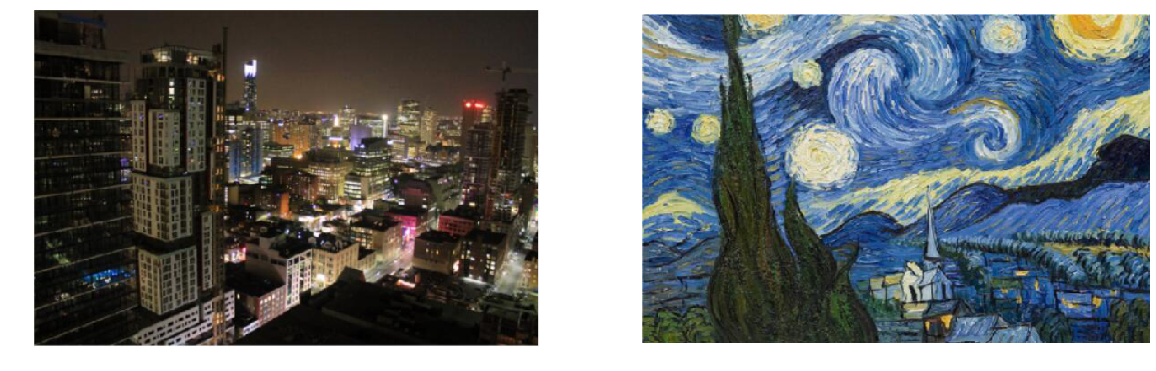

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(im_convert(content))
ax1.axis("off")
ax2.imshow(im_convert(style))
ax2.axis("off")

In [9]:
def get_features(image, model):
    layers = {'0': 'conv1_1',
              '5': 'conv2_1', 
              '10': 'conv3_1', 
              '19': 'conv4_1',
              '21': 'conv4_2',  # Content Extraction
              '28': 'conv5_1'}
    features = {}
    for name, layer in model._modules.items():
        image = layer(image)
        if name in layers:
            features[layers[name]] = image
    return features

In [10]:
content_features = get_features(content, vgg)
style_features = get_features(style, vgg)

In [11]:
def gram_matrix(tensor):
    _, d, h, w = tensor.size()
    tensor = tensor.view(d, h * w)
    gram = torch.mm(tensor, tensor.t())
    return gram

In [12]:
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

In [13]:
style_weights = {'conv1_1': 1.,
                 'conv2_1': 0.75,
                 'conv3_1': 0.2,
                 'conv4_1': 0.2,
                 'conv5_1': 0.2}

content_weight = 1  # alpha
style_weight = 1e6  # beta


In [14]:
target = content.clone().requires_grad_(True).to(device)

In [15]:
show_every = 300
optimizer = optim.Adam([target], lr=0.003)
steps = 2100

height, width, channels = im_convert(target).shape
image_array = np.empty(shape=(300, height, width, channels))
capture_frame = steps/300
counter = 0

Total loss:  827127.5
Iteration:  300


(-0.5, 602.5, 399.5, -0.5)

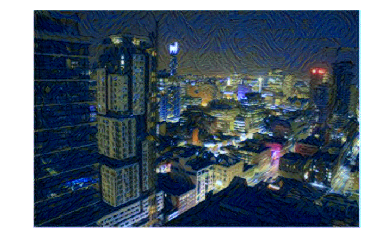

Total loss:  447883.9375
Iteration:  600


(-0.5, 602.5, 399.5, -0.5)

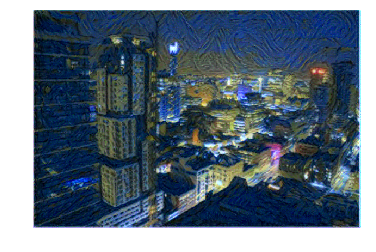

Total loss:  266240.9375
Iteration:  900


(-0.5, 602.5, 399.5, -0.5)

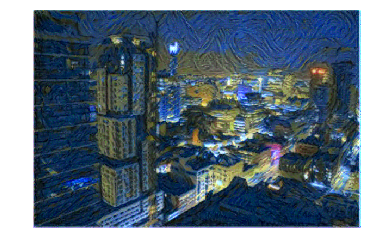

Total loss:  161898.71875
Iteration:  1200


(-0.5, 602.5, 399.5, -0.5)

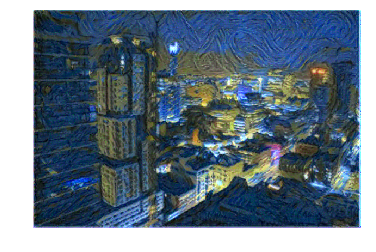

Total loss:  99483.3671875
Iteration:  1500


(-0.5, 602.5, 399.5, -0.5)

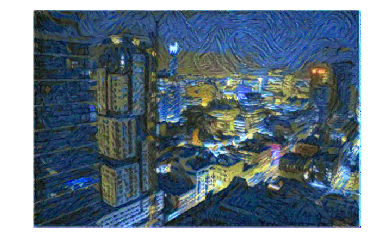

Total loss:  62329.48046875
Iteration:  1800


(-0.5, 602.5, 399.5, -0.5)

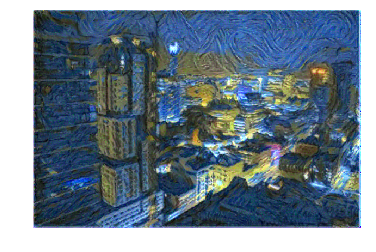

Total loss:  40713.1875
Iteration:  2100


(-0.5, 602.5, 399.5, -0.5)

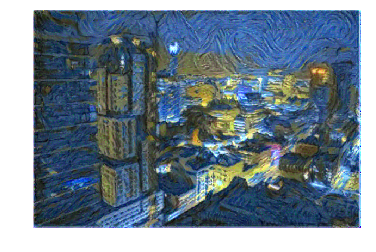

In [16]:
for ii in range(1, steps+1):
    target_features = get_features(target, vgg)
    content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)
    style_loss = 0
  
    for layer in style_weights:
        target_feature = target_features[layer]
        target_gram = gram_matrix(target_feature)
        style_gram = style_grams[layer]
        layer_style_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
        _, d, h, w = target_feature.shape
        style_loss += layer_style_loss / (d * h * w)
  
    total_loss = content_weight * content_loss + style_weight * style_loss
  
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    if  ii % show_every == 0:
        print('Total loss: ', total_loss.item())
        print('Iteration: ', ii)
        plt.imshow(im_convert(target))
        plt.axis("off")
        plt.show()
    
    if ii % capture_frame == 0:
        image_array[counter] = im_convert(target)
        counter = counter + 1

(-0.5, 602.5, 399.5, -0.5)

(-0.5, 616.5, 399.5, -0.5)

(-0.5, 602.5, 399.5, -0.5)

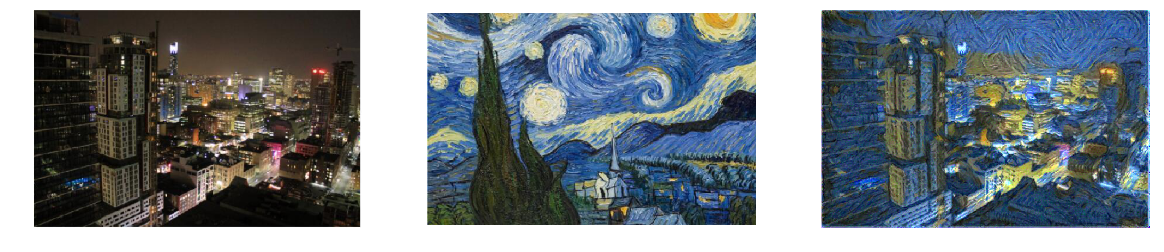

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(im_convert(content))
ax1.axis('off')
ax2.imshow(im_convert(style))
ax2.axis('off')
ax3.imshow(im_convert(target))
ax3.axis('off')

In [18]:
import cv2 

frame_height, frame_width, _ = im_convert(target).shape
vid = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'XVID'), 30, (frame_width, frame_height))
for i in range(0, 300):
    img = image_array[i]
    img = img*255
    img = np.array(img, dtype = np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    vid.write(img)
vid.release()

In [19]:
!ls

01_Linear_Regression.ipynb		City.jpg
02_Perceptron.ipynb			data
03_Deep_Neural_Networks.ipynb		LICENSE
04_DNN_MNIST.ipynb			output.mp4
05_Convolutional Neural Networks.ipynb	README.md
06_CIFAR_10.ipynb			StarryNight.jpg
07_Transfer_Learning.ipynb		Style_Transfer.ipynb
08_Style_Transfer.ipynb			vgg16-397923af.pth
ants_and_bees


In [ ]:
# from google.colab import files
# files.download('output.mp4')